In [13]:
from smote_main import smote_validate_synth
from data_help.data_help import *
from SMOTE.smote import *
from mlp.mlp import *
from data_help.stratcv import *
from scipy.stats import ttest_ind
from sklearn.metrics import roc_auc_score


## UCI Data
### flare

In [2]:
dataset_name = 'flare'
T = dataset_load(dataset_name)
T1, T2 = split_by_label(T)
mu = 0.1
beta = 10
h = 7

In [3]:
# standard MLP
mlp_base = MLP(T1.shape[1], h, 0.5, np.tanh, mu, beta)
base_acc = kfold_cv(mlp_base, T, k=5)

[[358.99585009]]
[[464.69360422]]
[[1113.42961014]]
[[352.94667048]]
[[618.7226847]]
[[775.60740884]]
[[440.88876708]]
[[912.57981059]]
[[406.69938077]]
[[759.47035303]]
[[388.5345698]]
[[1416.45911604]]
[[389.90427368]]
[[1502.78430554]]
[[403.07283962]]
[[1316.81882216]]
[[375.7189147]]
[[741.40675668]]
[[356.72485288]]
[[379.51400434]]
[[303.75963722]]
[[319.29758963]]
[[310.86058221]]
[[311.59912125]]
[[307.51357932]]
[[306.59944592]]
[[329.14721774]]
[[315.47980271]]
[[361.39582545]]
[[550.28447834]]
[[330.08121371]]
[[304.44989218]]
[[338.1364084]]
[[376.71496001]]
[[315.35767051]]
[[324.13308318]]
[[311.37967792]]
[[311.52207424]]
[[309.73722374]]
[[306.53870136]]
[[305.45527223]]
[[410.84420683]]
[[1243.08302458]]
[[864.98125302]]
[[468.95509894]]
[[437.29354102]]
[[520.93858032]]
[[1548.34754113]]
[[503.8043277]]
[[1416.22519674]]
[[582.64492608]]
[[886.41337171]]
[[422.61216387]]
[[645.78204476]]
[[714.0720645]]
[[431.13045459]]
[[370.33068887]]
[[374.12102919]]
[[405.4340055

In [8]:
# Smote
# Sample to give equal class balances
T_smote = T.copy()
T2_smote = SMOTE(T2, int(len(T1)/len(T2)) * 100, k=5)
for ex in T2_smote:
    ex.append(-1)
    ex.insert(0, 1) # add arbitrary index valiue
T2_smote = np.array(T2_smote)
T_smote = np.vstack((T_smote, T2_smote))

In [9]:
smote_mlp = MLP(T1.shape[1], 3, 0.4, np.tanh, mu, beta)
# K-Fold CV for the classifier on smote dataset
smote_acc  = kfold_cv(smote_mlp, T_smote, k=5, test=T)

Final loss= [[370.20338395]]
[0.03893805309734513, 0.9884169884169884, 0.8866171850425113, 0.2159827213822894, 0.5136775207571668, 0.1961811233969738]
Final loss= [[368.32148746]]6]][[647.969163]][[651.77628775]][[582.21644718]][[384.07895853]][[372.13113597]][[578.83673196]][[421.21051784]][[370.98775792]][[368.43387777]][[368.32158958]][[368.32148746]]
[0.8247787610619469, 0.27413127413127414, 0.33288592866459854, 0.7221022318214543, 0.5494550175966105, 0.47549726881058446]
Final loss= [[753.35257743]]
[0.5345132743362832, 0.33204633204633205, 0.35364976351747635, 0.49676025917926564, 0.4332798031913076, 0.4212875172295491]
Final loss= [[372.868033]]8406]][[379.55867161]][[368.59631102]][[367.67716965]][[368.78789788]][[368.98169259]][[368.70765871]][[368.77946893]][[368.70798625]][[373.87818478]][[374.13045259]][[376.45692636]][[372.868033]]
[0.008849557522123894, 1.0, 0.8942432259830307, 0.19366450683945285, 0.504424778761062, 0.09407208683835973]
Final loss= [[477.20870458]]
[0.57

[[1112.15582824]]
[[2090.84575011]]
[[1919.09662412]]
[[2008.16142103]]
[[2164.68309666]]
[[2098.05615894]]
[[2029.217986]]
[[2020.90323789]]
[[2108.79303764]]
[[2102.65679319]]
[[2100.094819]]
[[1624.14157524]]
[[2088.24466256]]
[[1751.76251854]]
[[1855.35909661]]
[[1851.69361282]]
[[1851.54065405]]
[[2211.63314488]]
[[2099.52674544]]
[[2067.68431163]]
[[2151.99992477]]
[[2117.98857343]]
[[2070.00000053]]
[[2165.99999402]]
[[2238.80715668]]
[[2194.00179589]]
[[2162.]]
[[2162.]]
Final loss= [[2162.]]
Re-optimizing from loss at 1751.763
[[1730.68216474]]
[[1914.82137115]]
[[1955.57713512]]
[[1970.44098704]]
[[1972.78948697]]
[[1973.57283551]]
[[1972.98927979]]
[[1901.78457105]]
[[1902.05323909]]
[[1900.8316414]]
[[1879.93041578]]
[[1879.96918917]]
[[1921.47708499]]
[[1875.92417194]]
[[1662.39171706]]
[[1815.27505381]]
[[1666.46276342]]
[[1659.87486985]]
[[1701.56177104]]
[[2064.99418851]]
[[1816.13403757]]
[[2110.39038434]]
[[2072.76553294]]
[[2108.23078006]]
[[2085.47918021]]
[[2085.38

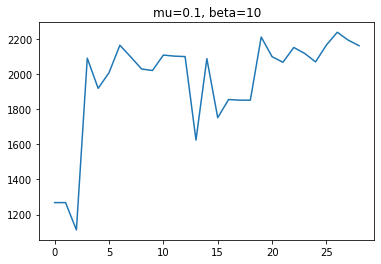

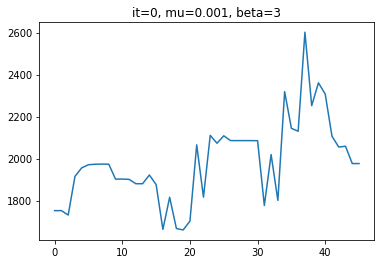

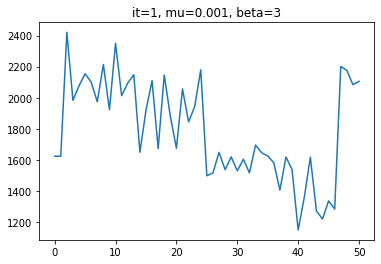

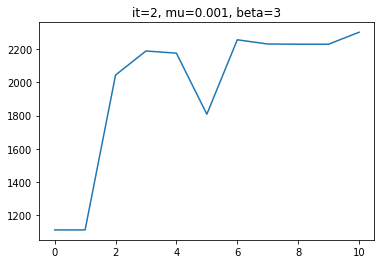

In [6]:
# A single training run on the smote dataset
smote_mlp1 = MLP(T1.shape[1], h, 0.5, np.tanh, mu, beta, repeat=True)
single_T2smote = [ex[1:-1] for ex in T2_smote]
smote_mlp1.train(T1, single_T2smote)
single_run_smote1 = eval_mlp(smote_mlp1, T, T1, T2)
print(single_run_smote1)

[1119.14050075]][[1090.19686153]][[1015.75148478]][[1056.75232765]][[974.66208582]][[1173.41285447]][[1175.102613]][[1184.0675087]][[1044.89888569]][[947.64270144]][[1124.32454135]][[1068.98919485]][[1038.53189855]][[1048.04885452]][[1078.16929394]][[1084.1879508]][[1016.97141192]][[1007.23780733]][[1005.85383431]][[1038.1394169]][[1046.45277395]][[965.49054187]][[1027.75611778]][[1030.44749317]][[1036.97843439]][[1029.41286854]][[1064.59559864]][[1007.1027637]][[1039.96840942]][[1054.96672246]][[1071.86063167]][[1045.50718528]][[1011.54826542]][[1022.51376402]][[1007.59374967]][[1010.74985215]][[1035.43125381]][[966.64277071]][[1006.43575311]][[1045.43168308]][[1066.12814621]][[1130.49472116]][[1078.51034228]][[1075.81388022]][[1036.38019712]][[999.31893783]][[1016.66385863]][[1013.35862647]][[1007.95209473]][[1018.36290045]][[1041.09835151]][[1085.20157706]][[1023.10461875]][[1079.12342435]][[1085.8645979]][[1084.96201431]][[1070.92228977]][[1031.23566903]][[1077.65408324]][[1045.638

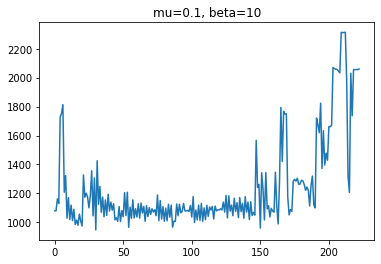

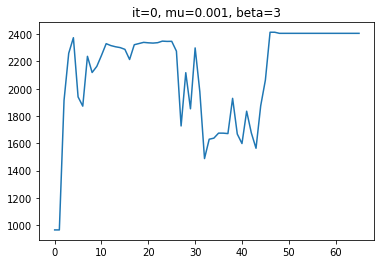

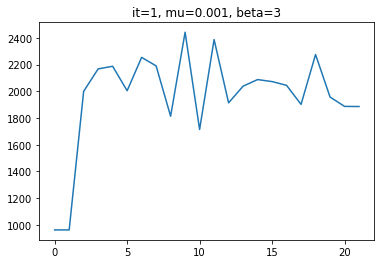

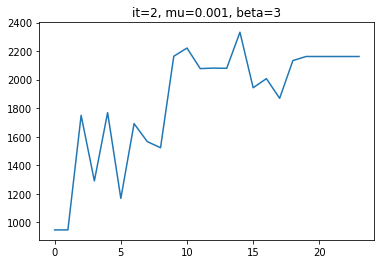

In [17]:
# A second training run on the smote dataset
smote_mlp2 = MLP(T1.shape[1], h, 0.5, np.tanh, mu, beta, repeat=True)
single_T2smote = [ex[1:-1] for ex in T2_smote]
smote_mlp2.train(T1, single_T2smote)
single_run_smote2 = eval_mlp(smote_mlp2, T, T1, T2)
print(single_run_smote2)

In [3]:
# Smote kmeans
T_smotek = T.copy()
T2_smotek = kmeans_SMOTE(T, T2, int(len(T1)/len(T2)) * 100, k=5, n_clusters=int(len(T2) / 30))
for ex in T2_smotek:
    ex.append(-1)
    ex.insert(0, 1) # add arbitrary index valiue
T2_smotek = np.array(T2_smotek)
T_smotek = np.vstack((T_smotek, T2_smotek))

Final loss= [[742.79587629]]
Re-optimizing from loss at 664.590
[726.51187884]][[753.49808804]][[696.87817813]][[679.59391545]][[743.96697795]][[743.95053047]]Final loss= [[743.95051735]]
Re-optimizing from loss at 659.609
Final loss= [[742.79587629]]
Re-optimizing from loss at 588.080
[773.27927212]][[629.94847066]][[823.20889872]][[801.73752589]][[731.8782778]][[719.15501704]][[785.38901702]][[763.85139538]][[778.51084381]][[746.13317647]][[745.77633767]][[746.18631983]][[747.483583]][[789.38695546]][[789.37076929]][[753.53402062]]Final loss= [[753.53402062]]
[0.6513274336283186, 0.6216216216216216, 0.6248065746615149, 0.6457883369330454, 0.6364745276249701, 0.6363011987248527]
[520.24389138]][[739.63436515]]Final loss= [[739.63430388]]
Re-optimizing from loss at 720.402
Final loss= [[407.55606519]]16]][[370.70278278]][[369.41570474]][[374.08764465]][[384.39542124]][[391.01138229]][[387.58806518]][[389.88994875]][[409.94182206]][[389.12777923]][[394.22037841]][[393.01642542]][[395.49

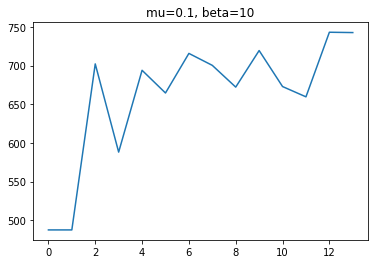

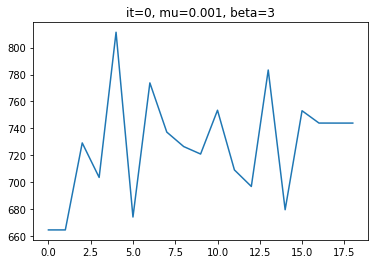

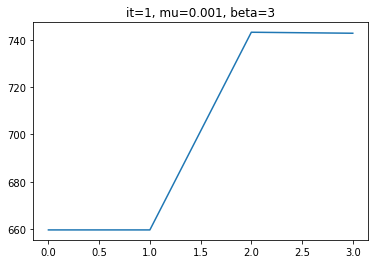

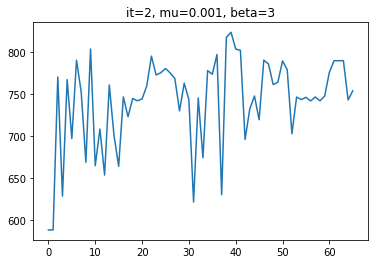

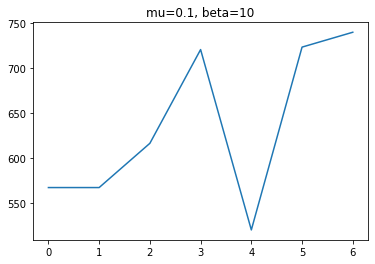

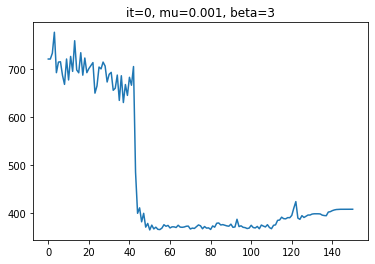

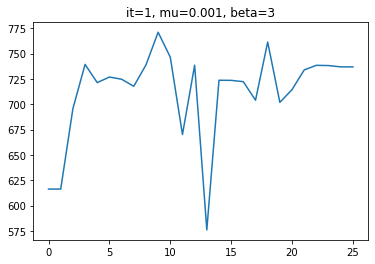

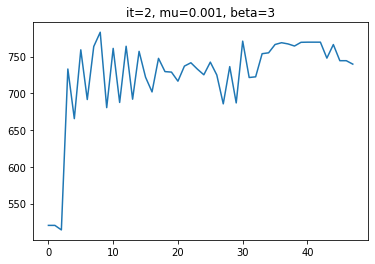

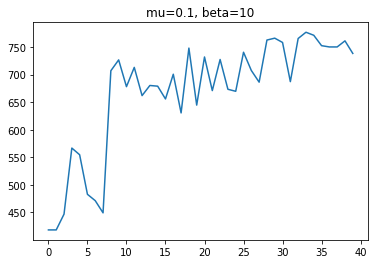

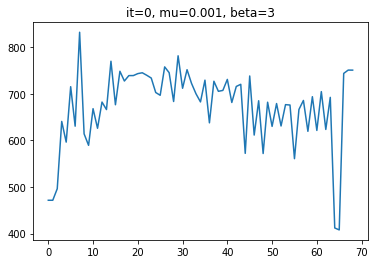

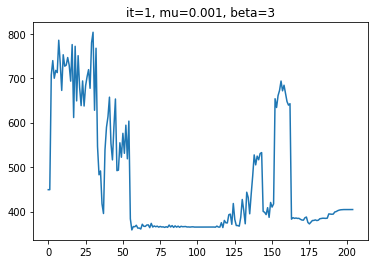

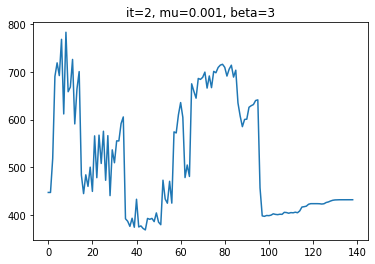

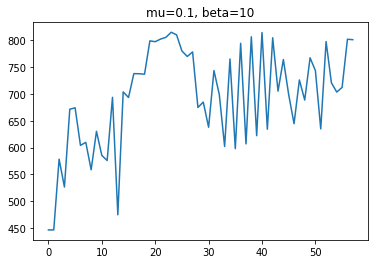

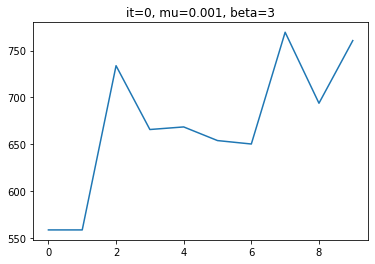

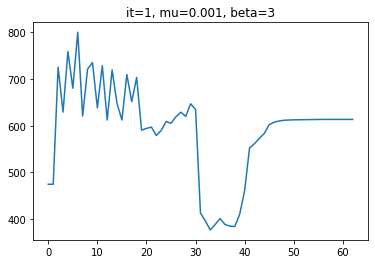

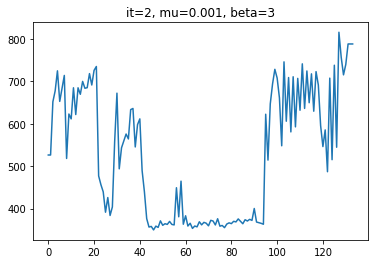

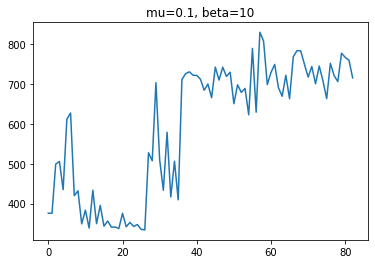

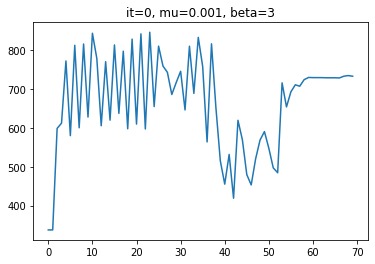

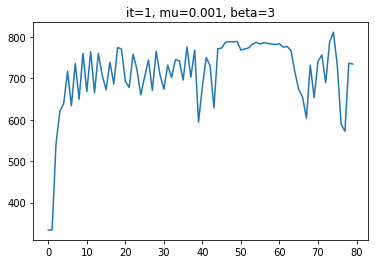

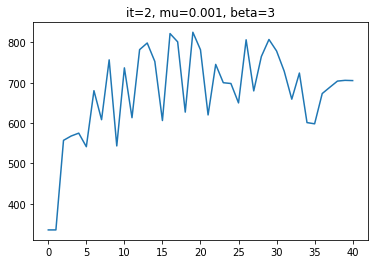

In [7]:
# K-fold cv on smotek dataset
smotek_mlp = MLP(T1.shape[1], 15, 0.4, np.tanh, mu, beta, repeat=True)
smotek_acc = kfold_cv(smotek_mlp, T_smotek, k=1, test=T)

Final loss= [[2068.00001435]]996]][[2068.00001435]]
Re-optimizing from loss at 1699.839
Final loss= [[2125.99999992]]
Re-optimizing from loss at 1572.188
Final loss= [[2068.59257874]]
Re-optimizing from loss at 1600.734
Final loss= [[1666.41186596]]
[0.7230088495575221, 0.44787644787644787, 0.585442648716985, 0.67170626349892, 0.585442648716985, 0.5690506439000488]


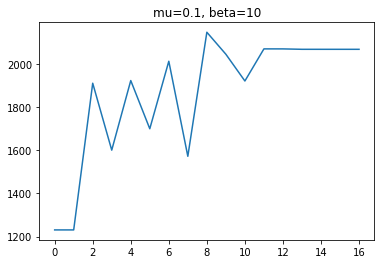

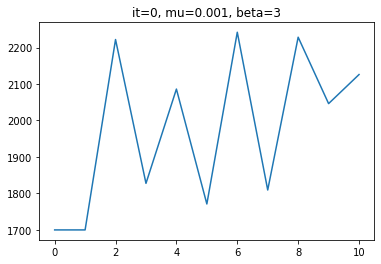

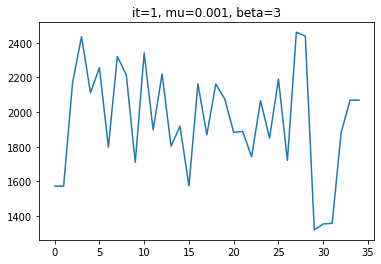

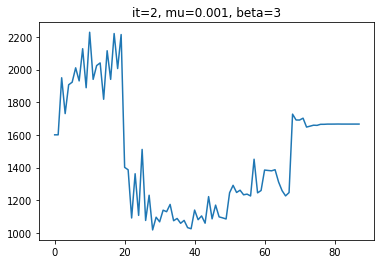

In [23]:
# Single run smote k dataset
single_smotek_mlp = MLP(T1.shape[1], h, 0.5, np.tanh, mu, beta, repeat=True)
single_T2 = [ex[1:-1] for ex in T2_smotek]
single_smotek_mlp.train(T1, single_T2)
single_run_smotek = eval_mlp(single_smotek_mlp, T, T1, T2)
print(single_run_smotek)

Final loss= [[900.36802172]]4389]][[1034.60573466]][[1037.45300828]][[1018.78622512]][[1019.28020757]][[1007.48725174]][[1006.05612972]][[999.47483441]][[994.82376238]][[1012.14279635]][[989.37766308]][[1023.59121854]][[981.49031194]][[1024.6480869]][[972.44862435]][[1014.30257084]][[959.98969751]][[1005.33169718]][[951.57326069]][[998.62568093]][[949.99181082]][[986.18242297]][[937.08588761]][[969.1019667]][[928.13001412]][[961.38686636]][[923.38327849]][[956.53135293]][[915.51750311]][[943.75295072]][[903.00855482]][[929.43088287]][[885.11951343]][[903.52583923]][[883.81369792]][[916.57699174]][[891.92561877]][[925.77836061]][[900.16714528]][[930.70367538]][[899.62314305]][[934.80476298]][[897.134353]][[937.74933935]][[892.77990905]][[942.52382691]][[894.05385028]][[945.15048287]][[892.08224402]][[946.24631256]][[892.1624664]][[950.52088531]][[893.83567852]][[957.06680348]][[895.80610875]][[961.00100683]][[893.48855369]][[962.06487273]][[901.39523197]][[974.55822479]][[901.80471223]]

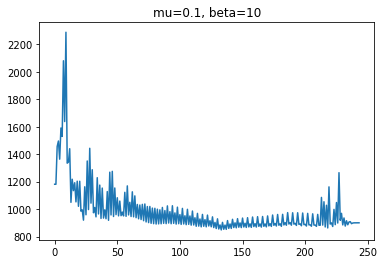

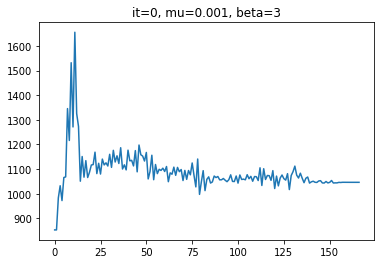

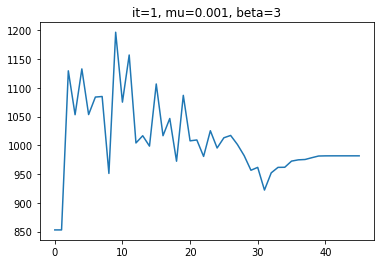

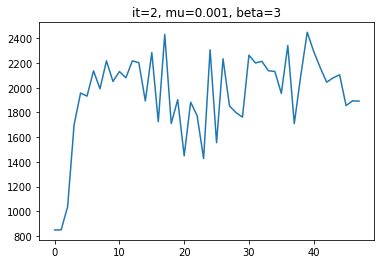

In [11]:
# Second single run
single_smotek_mlp1 = MLP(T1.shape[1], 13, 0.5, np.tanh, mu, beta, repeat=True)
single_smotek_mlp1.train(T1, single_T2)
single_run_smotek = eval_mlp(single_smotek_mlp1, T, T1, T2)
print(single_run_smotek)

In [20]:
base_acc = [[0.9601769911504425, 0.019230769230769232, 0.4897038801906059, 0.7841726618705036, 0.4897038801906059, 0.13588576870853147],
            [0.6769911504424779, 0.2692307692307692, 0.47311095983662355, 0.6007194244604317, 0.47311095983662355, 0.4269272165089171],
            [1.0, 0.0, 0.5, 0.8129496402877698, 0.5, 0.0],
            [0.8584070796460177, 0.038461538461538464, 0.44843430905377807, 0.7050359712230215, 0.44843430905377807, 0.18170211036050798],
            [1.0, 0.0, 0.5, 0.8158844765342961, 0.5, 0.0]]
final_accs = np.mean(base_acc, axis=0)
print(final_accs)

[0.89911504 0.06538462 0.48224983 0.74375243 0.48224983 0.14890302]


In [21]:
base_vs_smotek = ttest_ind(smote_acc, smotek_acc)
print(base_vs_smotek)

Ttest_indResult(statistic=array([-1.14252829,  0.22386899,  0.09997246, -1.38150674, -2.33926161,
       -1.76474834]), pvalue=array([0.28627336, 0.8284705 , 0.92282609, 0.20447735, 0.04747038,
       0.11560763]))
